In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Training Data.csv')

In [3]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [4]:
test= pd.read_csv('Test Data.csv')
test = test.drop('ID', axis=1)
test

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11
...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,single,rented,no,Statistician,Eluru[25],Andhra Pradesh,5,10
27996,2917765,47,9,single,rented,no,Technical writer,Ratlam,Madhya Pradesh,9,14
27997,8082415,24,5,single,rented,no,Lawyer,Mira-Bhayandar,Maharashtra,4,13
27998,9474180,51,13,single,rented,yes,Chartered Accountant,Bhilai,Chhattisgarh,13,14


In [5]:
df.isnull().sum();
df['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [6]:
df= df.drop('Id', axis=1)

In [7]:
nom_col= [3,5]
ordinal_col=[4,6,7,8]
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import  make_column_transformer
from sklearn import set_config
trans = make_column_transformer((OneHotEncoder(sparse=False),nom_col),
                               (OrdinalEncoder(), ordinal_col),
remainder ='passthrough')
set_config(display='diagram')

In [8]:
X = df.iloc[:, 0:11]
Y= df['Risk_Flag']

In [9]:
Y

0         0
1         0
2         0
3         1
4         1
         ..
251995    0
251996    0
251997    0
251998    0
251999    0
Name: Risk_Flag, Length: 252000, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size=0.35)

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
pipe_log= make_pipeline(trans, log)

In [12]:
pipe_log.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [3, 5]),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  [4, 6, 7, 8])])),
                ('logisticregression', LogisticRegression())])

In [13]:
pred= pipe_log.predict(x_test)
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
from sklearn.metrics import f1_score, accuracy_score
f1_score(pred,y_test)
accuracy_score(pred, y_test)

0.8758730158730159

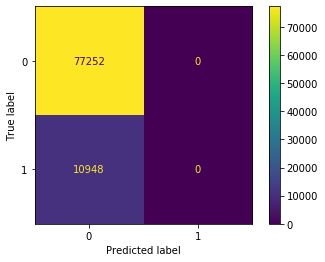

In [15]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(pipe_log, x_test, y_test)

In [21]:
tet=trans.fit(test)
tet

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [3, 5]),
                                ('ordinalencoder', OrdinalEncoder(),
                                 [4, 6, 7, 8])])

In [17]:
y_ter = y_test.iloc[0:28000]

In [23]:
pipe_log.predict(tet)

ValueError: Expected 2D array, got scalar array instead:
array=ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(sparse=False),
                                 [3, 5]),
                                ('ordinalencoder', OrdinalEncoder(),
                                 [4, 6, 7, 8])]).
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [24]:
f1_score(predd,y_test)

NameError: name 'predd' is not defined